In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

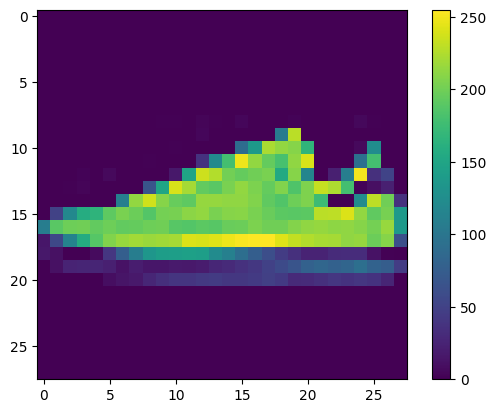

In [ ]:
plt.figure()
plt.imshow(X_train[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

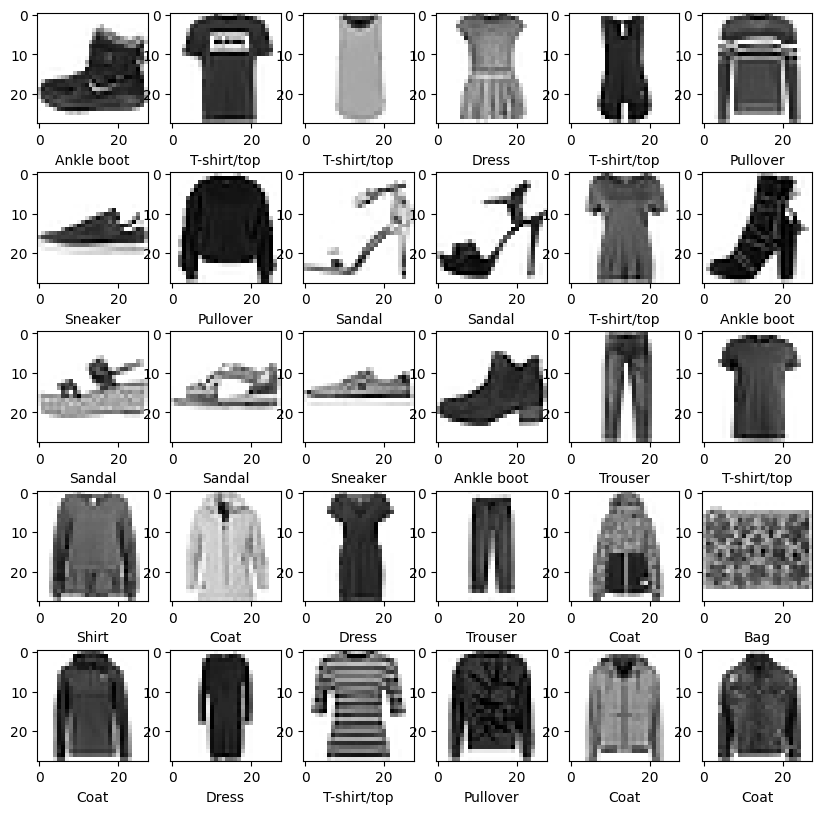

In [ ]:
plt.figure(figsize = (10,10))
for i in range(30):
  plt.subplot(5, 6, i+1)
  plt.imshow(X_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

plt.show()


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7840 - loss: 0.6175
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8629 - loss: 0.3821
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8768 - loss: 0.3419
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8861 - loss: 0.3099
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8957 - loss: 0.2895
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8958 - loss: 0.2788
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8997 - loss: 0.2674
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9067 - loss: 0.2556
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9094 - loss: 0.2445
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9139 - loss: 0.2299


#Evaluating Accuracy

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
print(test_acc)

313/313 - 0s - 2ms/step - accuracy: 0.8890 - loss: 0.3217
0.8889999985694885


# Predictions

In [ ]:
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()
])

In [ ]:
predictions = probability_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print(f"The predicted class for 1st test image is {class_names[np.argmax(predictions[0])]}")
print(f"The real class for 1st test image is {class_names[y_test[0]]}")

The predicted class for 1st test image is Ankle boot
The real class for 1st test image is Ankle boot
